In [44]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/RT_IOT2022.csv')
data

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,31004,53,udp,dns,0.005875,1,1,1,1,170.209561,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
1,54222,443,tcp,-,7.807541,159,144,134,38,20.364926,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3216,11890,Alexa
2,48618,80,tcp,http,0.216894,7,7,1,2,32.273807,...,0.0,0.0,0.0,0.0,0.0,0.0,29200,29200,1065,Alexa
3,8,0,icmp,-,0.014496,10,10,10,10,689.841286,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
4,54222,443,tcp,-,8.797776,158,176,133,45,17.959084,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3220,11890,Alexa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209954,59247,63331,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
209955,59247,64623,tcp,-,0.000007,1,1,0,0,144631.172400,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
209956,59247,64680,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
209957,59247,65000,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN


In [4]:
duplicate_rows = data[data.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
        id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
616          5353       5353   udp     dns            0.0             1   
1735         5353       5353   udp     dns            0.0             1   
1761         5353       5353   udp     dns            0.0             1   
2201         5353       5353   udp     dns            0.0             1   
2373        48692        443   tcp       -            0.0             1   
...           ...        ...   ...     ...            ...           ...   
206059       5353       5353   udp     dns            0.0             1   
206109      59342         80   tcp       -            0.0             1   
206548       5353       5353   udp     dns            0.0             1   
206675       5353       5353   udp     dns            0.0             1   
206676       5353       5353   udp     dns            0.0             1   

        bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
616

In [5]:
# Save DataFrame as a CSV file
duplicate_rows.to_csv('duplicate_rows.csv', index=False)

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(204544, 84)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204544 entries, 0 to 209958
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 204544 non-null  int64  
 1   id.resp_p                 204544 non-null  int64  
 2   proto                     204544 non-null  object 
 3   service                   204544 non-null  object 
 4   flow_duration             204544 non-null  float64
 5   fwd_pkts_tot              204544 non-null  int64  
 6   bwd_pkts_tot              204544 non-null  int64  
 7   fwd_data_pkts_tot         204544 non-null  int64  
 8   bwd_data_pkts_tot         204544 non-null  int64  
 9   fwd_pkts_per_sec          204544 non-null  float64
 10  bwd_pkts_per_sec          204544 non-null  float64
 11  flow_pkts_per_sec         204544 non-null  float64
 12  down_up_ratio             204544 non-null  float64
 13  fwd_header_size_tot       204544 non-null  int64 

In [9]:
data['Attack_type'].value_counts()

Attack_type
DOS_SYN_Hping                 90089
Alexa                         86622
Thing_Speak                    7654
ARP_poisioning                 7625
MQTT_Publish                   4142
NMAP_UDP_SCAN                  2584
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  533
Wipro_bulb                      219
Metasploit_Brute_Force_SSH       36
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

In [10]:
data['proto'].value_counts()

proto
tcp     185349
udp      17157
icmp      2038
Name: count, dtype: int64

In [11]:
data.isnull().sum()

id.orig_p               0
id.resp_p               0
proto                   0
service                 0
flow_duration           0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 84, dtype: int64

In [12]:
# Dropping rows based on 'Attack_type' column values as these have very low values

data_new = data[~data['Attack_type'].isin(['Metasploit_Brute_Force_SSH', 'NMAP_FIN_SCAN'])]

In [13]:
data_new['Attack_type'].value_counts()

Attack_type
DOS_SYN_Hping          90089
Alexa                  86622
Thing_Speak             7654
ARP_poisioning          7625
MQTT_Publish            4142
NMAP_UDP_SCAN           2584
NMAP_XMAS_TREE_SCAN     2010
NMAP_OS_DETECTION       2000
NMAP_TCP_scan           1002
DDOS_Slowloris           533
Wipro_bulb               219
Name: count, dtype: int64

In [14]:
data_new.shape

(204480, 84)

In [15]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.7 MB/s eta 0:00:00


In [16]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['proto'], use_cat_names=True)

# Fit and transform the data
data_encoded = encoder.fit_transform(data_new)

In [17]:
data_encoded.head()

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,31004,53,1,0,0,dns,0.005875,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
1,54222,443,0,1,0,-,7.807541,159,144,134,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3216,11890,Alexa
2,48618,80,0,1,0,http,0.216894,7,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,29200,29200,1065,Alexa
3,8,0,0,0,1,-,0.014496,10,10,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
4,54222,443,0,1,0,-,8.797776,158,176,133,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3220,11890,Alexa


# **SOLVING IMBALANCE----------------------------------------------------------------------**

# **OVERSAMPLING THE LOWER CLASSES**

In [18]:
data_encoded.to_csv('complete_encoded_dataset.csv', index=False)

In [19]:
import pandas as pd

# Load the large dataset
large_df = pd.read_csv('complete_encoded_dataset.csv')

# Define the specific class labels you want to filter
desired_labels = ['NMAP_TCP_scan', 'DDOS_Slowloris', 'Wipro_bulb']

# Filter the dataset to include only rows with desired class labels
smaller_df = large_df[large_df['Attack_type'].isin(desired_labels)]

# Optionally, you can reset the index of the smaller DataFrame
smaller_df.reset_index(drop=True, inplace=True)

# Save the smaller dataset to a new file if needed
smaller_df.to_csv('lower_class_dataset.csv', index=False)

In [20]:
data_to_oversamp=pd.read_csv('lower_class_dataset.csv')
data_to_oversamp

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,52170,443,0,1,0,ssl,1.873034,10,11,5,...,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,4380,65535,4380,Wipro_bulb
1,62443,53,1,0,0,dns,0.006028,1,1,1,...,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,0,0,0,Wipro_bulb
2,49795,6668,0,1,0,-,22.644121,5,6,2,...,3016277.820,6129478.931,1.186331e+07,17992789.98,8996394.992,4.054432e+06,65535,4380,0,Wipro_bulb
3,49797,6668,0,1,0,irc,78.044458,38,25,13,...,4518600.340,5014911.890,5.916898e+06,31662307.74,5277051.290,3.381018e+05,65535,4380,65535,Wipro_bulb
4,49800,6668,0,1,0,irc,96.762810,69,53,24,...,8109716.924,5859549.999,1.657937e+07,51309290.17,8551548.362,4.045696e+06,65535,4380,65535,Wipro_bulb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,59074,64623,0,1,0,-,0.000001,1,1,0,...,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,64240,0,64240,NMAP_TCP_scan
1750,49670,64680,0,1,0,-,0.000004,1,1,0,...,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,64240,0,64240,NMAP_TCP_scan
1751,47298,65000,0,1,0,-,0.000003,1,1,0,...,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,64240,0,64240,NMAP_TCP_scan
1752,49246,65129,0,1,0,-,0.000002,1,1,0,...,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,64240,0,64240,NMAP_TCP_scan


In [21]:
data_to_oversamp['Attack_type'].value_counts()

Attack_type
NMAP_TCP_scan     1002
DDOS_Slowloris     533
Wipro_bulb         219
Name: count, dtype: int64

In [22]:
# Separate features and target variable
# x = data_new.drop('Attack_type', axis=1)
y_oversamp = data_to_oversamp['Attack_type']
X_oversamp = data_to_oversamp.drop(columns=['Attack_type', 'service'])
X_oversamp

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,52170,443,0,1,0,1.873034,10,11,5,4,...,2.761923e+06,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,4380,65535,4380
1,62443,53,1,0,0,0.006028,1,1,1,1,...,6.027937e+03,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,0,0,0
2,49795,6668,0,1,0,22.644121,5,6,2,5,...,2.325666e+06,3016277.820,6129478.931,1.186331e+07,17992789.98,8996394.992,4.054432e+06,65535,4380,0
3,49797,6668,0,1,0,78.044458,38,25,13,13,...,6.627024e+06,4518600.340,5014911.890,5.916898e+06,31662307.74,5277051.290,3.381018e+05,65535,4380,65535
4,49800,6668,0,1,0,96.762810,69,53,24,34,...,6.495426e+06,8109716.924,5859549.999,1.657937e+07,51309290.17,8551548.362,4.045696e+06,65535,4380,65535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,59074,64623,0,1,0,0.000001,1,1,0,0,...,9.536740e-01,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,64240,0,64240
1750,49670,64680,0,1,0,0.000004,1,1,0,0,...,4.053116e+00,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,64240,0,64240
1751,47298,65000,0,1,0,0.000003,1,1,0,0,...,3.099442e+00,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,64240,0,64240
1752,49246,65129,0,1,0,0.000002,1,1,0,0,...,1.907349e+00,0.000,0.000,0.000000e+00,0.00,0.000,0.000000e+00,64240,0,64240


In [23]:
y_oversamp

0          Wipro_bulb
1          Wipro_bulb
2          Wipro_bulb
3          Wipro_bulb
4          Wipro_bulb
            ...      
1749    NMAP_TCP_scan
1750    NMAP_TCP_scan
1751    NMAP_TCP_scan
1752    NMAP_TCP_scan
1753    NMAP_TCP_scan
Name: Attack_type, Length: 1754, dtype: object

In [24]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train_oversamp, X_test_oversamp, y_train_oversamp, y_test_oversamp = train_test_split(X_oversamp, y_oversamp, test_size=0.3, random_state=42)

In [25]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

# Define the desired number of samples for each class
# For example, if you want to oversample class 0 to have 1000 instances and class 1 to have 1500 instances
desired_samples = {'NMAP_TCP_scan':1200, 'DDOS_Slowloris':1200, 'Wipro_bulb':1200}
#desired_samples = {'NMAP_TCP_scan':5000, 'DDOS_Slowloris':5000, 'Wipro_bulb':5000}
#CHANGE THIS----------------------------------------------------------------------------------------------------------------------------

# Initialize the SMOTE algorithm with a custom sampling strategy
smote = SMOTE(sampling_strategy=desired_samples, random_state=42)

# Oversample the dataset
X_smote, y_smote = smote.fit_resample(X_train_oversamp, y_train_oversamp)

# Check the class distribution after oversampling
print(pd.Series(y_smote).value_counts())


Attack_type
DDOS_Slowloris    1200
NMAP_TCP_scan     1200
Wipro_bulb        1200
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1200) in class NMAP_TCP_scan will be larger than the number of samples in the majority class (class #NMAP_TCP_scan -> 696)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1200) in class DDOS_Slowloris will be larger than the number of samples in the majority class (class #NMAP_TCP_scan -> 696)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1200) in class Wipro_bulb will be larger than the number of samples in the majority class (class #NMAP_TCP_scan -> 696)
  warnings.warn(


In [26]:
X_oversampled = pd.concat([X_smote, X_test_oversamp], axis=0)
y_oversampled= pd.concat([y_smote, y_test_oversamp],axis=0)

In [27]:
from collections import Counter

counter = Counter(y_oversampled)
print('Before',counter)

Before Counter({'NMAP_TCP_scan': 1506, 'DDOS_Slowloris': 1366, 'Wipro_bulb': 1255})


# **STRATIFIED SAMPLING OF THE UPPER CLASSES**

In [28]:
import pandas as pd

# Load the large dataset
large_df = pd.read_csv('complete_encoded_dataset.csv')

# Define the specific class labels you want to filter
desired_labels = ['DOS_SYN_Hping', 'Alexa']

# Filter the dataset to include only rows with desired class labels
upperclass_df = large_df[large_df['Attack_type'].isin(desired_labels)]

# Optionally, you can reset the index of the smaller DataFrame
upperclass_df.reset_index(drop=True, inplace=True)

# Save the smaller dataset to a new file if needed
upperclass_df.to_csv('upper_class_dataset.csv', index=False)

In [29]:
data_to_stratify=pd.read_csv('upper_class_dataset.csv')
data_to_stratify

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,31004,53,1,0,0,dns,0.005875,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
1,54222,443,0,1,0,-,7.807541,159,144,134,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3216,11890,Alexa
2,48618,80,0,1,0,http,0.216894,7,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,29200,29200,1065,Alexa
3,8,0,0,0,1,-,0.014496,10,10,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
4,54222,443,0,1,0,-,8.797776,158,176,133,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3220,11890,Alexa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176706,34865,21,0,1,0,-,0.000000,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
176707,42729,21,0,1,0,-,0.000000,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
176708,44682,21,0,1,0,-,0.000000,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
176709,41378,21,0,1,0,-,0.000000,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping


In [30]:
data_to_stratify['Attack_type'].value_counts()

Attack_type
DOS_SYN_Hping    90089
Alexa            86622
Name: count, dtype: int64

In [31]:
# Separate features and target variable
# x = data_new.drop('Attack_type', axis=1)
y_to_stratify = data_to_stratify['Attack_type']
X_to_stratify = data_to_stratify.drop(columns=['Attack_type', 'service'])
X_to_stratify

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,31004,53,1,0,0,0.005875,1,1,1,1,...,5.875111e+03,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,54222,443,0,1,0,7.807541,159,144,134,38,...,7.807541e+06,0.0,0.0,0.0,0.0,0.0,0.0,11890,3216,11890
2,48618,80,0,1,0,0.216894,7,7,1,2,...,3.060679e+05,0.0,0.0,0.0,0.0,0.0,0.0,29200,29200,1065
3,8,0,0,0,1,0.014496,10,10,10,10,...,1.449609e+04,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,54222,443,0,1,0,8.797776,158,176,133,45,...,8.797776e+06,0.0,0.0,0.0,0.0,0.0,0.0,11890,3220,11890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176706,34865,21,0,1,0,0.000000,1,0,1,0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64
176707,42729,21,0,1,0,0.000000,1,0,1,0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64
176708,44682,21,0,1,0,0.000000,1,0,1,0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64
176709,41378,21,0,1,0,0.000000,1,0,1,0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64


In [32]:
len(X_to_stratify)

176711

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Define the number of samples you want for each class
num_samples_per_class = 5000

# Compute the number of classes
num_classes = len(np.unique(y_to_stratify))

# Compute the total number of samples to select
total_samples_to_select = num_samples_per_class * num_classes

# Calculate the ratio of samples to select
test_size = min(1.0, total_samples_to_select / len(X_to_stratify))

# Initialize StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)

# Get the indices for stratified sampling
for train_index, _ in stratified_split.split(X_to_stratify, y_to_stratify):
    X_stratified, y_stratified = X_to_stratify.iloc[train_index], y_to_stratify.iloc[train_index]
    break

# Check the class distribution after stratified sampling
print(pd.Series(y_stratified).value_counts())


Attack_type
DOS_SYN_Hping    84991
Alexa            81720
Name: count, dtype: int64


In [34]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Undersample the dataset
X_resampled, y_resampled = undersampler.fit_resample(X_to_stratify, y_to_stratify)

# Check the class distribution after undersampling
print(pd.Series(y_resampled).value_counts())


Attack_type
Alexa            86622
DOS_SYN_Hping    86622
Name: count, dtype: int64


In [35]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming X_to_stratify and y_to_stratify are your feature and target data, respectively

# Define the number of samples you want for each class
num_samples_per_class = 5000

# Compute the number of classes
num_classes = len(y_to_stratify.unique())

# Initialize lists to store the stratified samples
stratified_samples_X = []
stratified_samples_y = []

# Perform stratified sampling for each class
for class_label in range(num_classes):
    # Filter data for the current class
    X_class = X_resampled[y_resampled == 'DOS_SYN_Hping']
    y_class = y_resampled[y_resampled == 'Alexa']

    # Check if there are samples available for the current class
    if len(X_class) == 0:
        print(f"Warning: No samples available for class {class_label}. Skipping stratified sampling for this class.")
        continue

    # Ensure the number of samples to select does not exceed the available samples
    num_samples_to_select = min(num_samples_per_class, len(X_class))

    # Perform stratified sampling for the current class
    stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=num_samples_to_select, random_state=42)
    for train_index, _ in stratified_split.split(X_class, y_class):
        X_stratified_class, y_stratified_class = X_class.iloc[train_index], y_class.iloc[train_index]

    # Add the stratified samples for the current class to the lists
    stratified_samples_X.append(X_stratified_class)
    stratified_samples_y.append(y_stratified_class)

# Concatenate the stratified samples for all classes
if stratified_samples_X and stratified_samples_y:
    X_stratified = pd.concat(stratified_samples_X)
    y_stratified = pd.concat(stratified_samples_y)

    # Shuffle the concatenated samples
    stratified_indices = pd.RangeIndex(len(X_stratified))
    stratified_indices_permuted = stratified_indices.to_numpy()
    np.random.shuffle(stratified_indices_permuted)
    X_stratified = X_stratified.iloc[stratified_indices_permuted]
    y_stratified = y_stratified.iloc[stratified_indices_permuted]

    # Trim excess samples if necessary
    num_samples_to_trim = len(X_stratified) - (num_samples_per_class * num_classes)
    if num_samples_to_trim > 0:
        X_stratified = X_stratified[:-num_samples_to_trim]
        y_stratified = y_stratified[:-num_samples_to_trim]

    # Check the class distribution after stratified sampling
    print(pd.Series(y_stratified).value_counts())
else:
    print("Error: No samples available for any class. Unable to perform stratified sampling.")


Attack_type
Alexa    10000
Name: count, dtype: int64


# **MIDDLE PORTION**

In [36]:
import pandas as pd

# Load the large dataset
large_df = pd.read_csv('complete_encoded_dataset.csv')

# Define the specific class labels you want to filter
desired_labels = ['Thing_Speak' ,'ARP_poisioning'    ,      'MQTT_Publish'     ,       'NMAP_UDP_SCAN' ,         'NMAP_XMAS_TREE_SCAN'  ,   'NMAP_OS_DETECTION'     ]

# Filter the dataset to include only rows with desired class labels
middle_df = large_df[large_df['Attack_type'].isin(desired_labels)]

# Optionally, you can reset the index of the smaller DataFrame
smaller_df.reset_index(drop=True, inplace=True)

# Save the smaller dataset to a new file if needed
middle_df.to_csv('mid_classes_dataset.csv', index=False)

In [37]:
data_mid=pd.read_csv('mid_classes_dataset.csv')

In [38]:
data_mid['Attack_type'].value_counts()

Attack_type
Thing_Speak            7654
ARP_poisioning         7625
MQTT_Publish           4142
NMAP_UDP_SCAN          2584
NMAP_XMAS_TREE_SCAN    2010
NMAP_OS_DETECTION      2000
Name: count, dtype: int64

In [39]:
# Separate features and target variable
# x = data_new.drop('Attack_type', axis=1)
y_mid = data_mid['Attack_type']
X_mid = data_mid.drop(columns=['Attack_type', 'service'])
X_mid

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,38667,1883,0,1,0,32.011598,9,5,3,3,...,2.282415e+06,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502
1,51143,1883,0,1,0,31.883584,9,5,3,3,...,2.028307e+06,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502
2,44761,1883,0,1,0,32.124053,9,5,3,3,...,2.281904e+06,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502
3,60893,1883,0,1,0,31.961063,9,5,3,3,...,2.047288e+06,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502
4,51087,1883,0,1,0,31.902362,9,5,3,3,...,2.087657e+06,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26010,59247,63331,0,1,0,0.000006,1,1,0,0,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
26011,59247,64623,0,1,0,0.000007,1,1,0,0,...,6.914139e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
26012,59247,64680,0,1,0,0.000006,1,1,0,0,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
26013,59247,65000,0,1,0,0.000006,1,1,0,0,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024


In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Define the number of samples you want for each class
# num_samples_per_class = 5000
num_samples_per_class = 1200

# Compute the number of classes
num_classes = len(np.unique(y_mid))

# Compute the total number of samples to select
total_samples_to_select = num_samples_per_class * num_classes

# Calculate the ratio of samples to select
test_size = min(1.0, total_samples_to_select / len(X_mid))

# Initialize StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)

# Get the indices for stratified sampling
for train_index, _ in stratified_split.split(X_mid, y_mid):
    X_stratified, y_stratified = X_mid.iloc[train_index], y_mid.iloc[train_index]
    break

# Check the class distribution after stratified sampling
print(pd.Series(y_stratified).value_counts())


Attack_type
Thing_Speak            5536
ARP_poisioning         5515
MQTT_Publish           2995
NMAP_UDP_SCAN          1869
NMAP_XMAS_TREE_SCAN    1454
NMAP_OS_DETECTION      1446
Name: count, dtype: int64


In [41]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming X_to_stratify and y_to_stratify are your feature and target data, respectively

# Define the number of samples you want for each class
num_samples_per_class = 1200

# Get unique class labels from y_to_stratify
unique_classes = y_mid.unique()

# Initialize lists to store the stratified samples
stratified_samples_X = []
stratified_samples_y = []

# Perform stratified sampling for each class
for class_label in unique_classes:
    # Filter data for the current class
    X_class = X_mid[y_mid == class_label]
    y_class = y_mid[y_mid == class_label]

    # Ensure the number of samples to select does not exceed the available samples
    num_samples_to_select = min(num_samples_per_class, len(X_class))

    # Create StratifiedShuffleSplit object for stratified sampling
    stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=num_samples_to_select, random_state=42)

    # Split the data into training and test sets
    for train_index, _ in stratified_split.split(X_class, y_class):
        X_stratified_class, y_stratified_class = X_class.iloc[train_index], y_class.iloc[train_index]

    # Add the stratified samples for the current class to the lists
    stratified_samples_X.append(X_stratified_class)
    stratified_samples_y.append(y_stratified_class)

# Concatenate the stratified samples for all classes
if stratified_samples_X and stratified_samples_y:
    X_stratified_mid = pd.concat(stratified_samples_X)
    y_stratified_mid = pd.concat(stratified_samples_y)

    # Shuffle the concatenated samples
    stratified_indices = pd.RangeIndex(len(X_stratified_mid))
    stratified_indices_permuted = stratified_indices.to_numpy()
    np.random.shuffle(stratified_indices_permuted)
    X_stratified_mid = X_stratified_mid.iloc[stratified_indices_permuted]
    y_stratified_mid = y_stratified_mid.iloc[stratified_indices_permuted]

    # Trim excess samples if necessary
    num_samples_to_trim = len(X_stratified_mid) - (num_samples_per_class * len(unique_classes))
    if num_samples_to_trim > 0:
        X_stratified_mid = X_stratified_mid[:-num_samples_to_trim]
        y_stratified_mid = y_stratified_mid[:-num_samples_to_trim]

    # Check the class distribution after stratified sampling
    print(pd.Series(y_stratified_mid).value_counts())
else:
    print("Error: No samples available for any class. Unable to perform stratified sampling.")


Attack_type
ARP_poisioning         2509
Thing_Speak            2466
MQTT_Publish           1112
NMAP_UDP_SCAN           514
NMAP_XMAS_TREE_SCAN     308
NMAP_OS_DETECTION       291
Name: count, dtype: int64


# **COMBINING EVERYTHING**

In [42]:
X_combined=pd.concat([X_oversampled, X_stratified, X_mid], axis=0, ignore_index=True)
y_combined=pd.concat([y_oversampled, y_stratified, y_mid], axis=0, ignore_index=True)

In [43]:
from collections import Counter

counter = Counter(y_combined)
print('Before',counter)

Before Counter({'Thing_Speak': 13190, 'ARP_poisioning': 13140, 'MQTT_Publish': 7137, 'NMAP_UDP_SCAN': 4453, 'NMAP_XMAS_TREE_SCAN': 3464, 'NMAP_OS_DETECTION': 3446, 'NMAP_TCP_scan': 1506, 'DDOS_Slowloris': 1366, 'Wipro_bulb': 1255})


# **SCALING**

In [46]:
# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_combined)
X_scaled

array([[0.7622773 , 0.00122345, 0.        , ..., 0.98023957, 0.99427787,
        0.00766003],
       [0.76120771, 0.00122345, 0.        , ..., 0.98023957, 0.99427787,
        0.00766003],
       [0.84460471, 0.00122345, 0.        , ..., 0.98023957, 0.99427787,
        0.00764477],
       ...,
       [0.90528069, 0.9891572 , 0.        , ..., 0.01562524, 0.        ,
        0.01562524],
       [0.90528069, 0.99405099, 0.        , ..., 0.01562524, 0.        ,
        0.01562524],
       [0.90528069, 0.9960238 , 0.        , ..., 0.01562524, 0.        ,
        0.01562524]])

In [47]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X_combined.columns)

X_scaled_df.head()

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,0.762277,0.001223,0.0,1.0,0.0,1.468589e-07,0.000921,0.000297,0.000460,0.000000,...,7.294362e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.98024,0.994278,0.007660
1,0.761208,0.001223,0.0,1.0,0.0,2.360512e-07,0.000921,0.000297,0.000460,0.000000,...,1.172384e-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.98024,0.994278,0.007660
2,0.844605,0.001223,0.0,1.0,0.0,1.406659e-03,0.001841,0.000692,0.000921,0.000099,...,2.550319e-03,0.004042,0.038277,0.052447,0.001298,0.045362,0.024883,0.98024,0.994278,0.007645
3,0.845797,0.001223,0.0,1.0,0.0,1.308845e-03,0.001381,0.000494,0.000921,0.000000,...,3.244906e-06,0.000005,0.031206,0.063576,0.001356,0.047391,0.056843,0.98024,0.994278,0.007660
4,0.818262,0.065439,0.0,1.0,0.0,2.761371e-10,0.000230,0.000099,0.000000,0.000000,...,1.416910e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.98024,0.000000,0.980240


In [48]:
X_scaled_df.shape

(48957, 84)

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


# **DIMENSIONALITY REDUCTION**

PCA reduced the feature space to 9 components.
Top contributing features for PC1:
9022     1.00000
28160    1.00000
5558     0.99809
11592    0.99809
28048    0.99809
Name: id.orig_p, dtype: float64
Top contributing features for PC2:
44362    1.0
48057    1.0
42761    1.0
47199    1.0
782      1.0
Name: id.resp_p, dtype: float64
Top contributing features for PC3:
39396    1.0
39174    1.0
32986    1.0
15350    1.0
15349    1.0
Name: proto_udp, dtype: float64
Top contributing features for PC4:
0        1.0
25416    1.0
25430    1.0
25429    1.0
25428    1.0
Name: proto_tcp, dtype: float64
Top contributing features for PC5:
14563    1.0
27720    1.0
22437    1.0
21487    1.0
18991    1.0
Name: proto_icmp, dtype: float64
Top contributing features for PC6:
4042    1.000000
727     0.863453
3331    0.861006
3565    0.860465
3557    0.831659
Name: flow_duration, dtype: float64
Top contributing features for PC7:
4042    1.000000
587     0.816801
3280    0.685846
3206    0.637745
3326    0.610

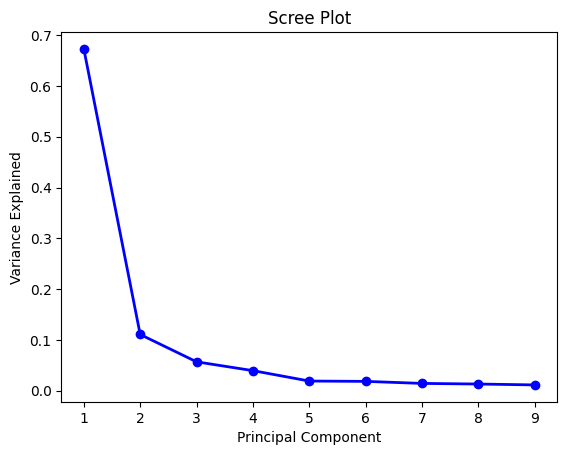

In [50]:
# Step 2: PCA

# Applying PCA to reduce dimensionality while retaining 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled_df)

# The number of components chosen by PCA
n_components = pca.n_components_
print(f"PCA reduced the feature space to {n_components} components.")

for i in range(pca.n_components_):
        sorted_loading = X_scaled_df.iloc[:, i].sort_values(key=abs, ascending=False)
        print(f"Top contributing features for PC{i+1}:")
        print(sorted_loading.head())  # Shows top 5 features


PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

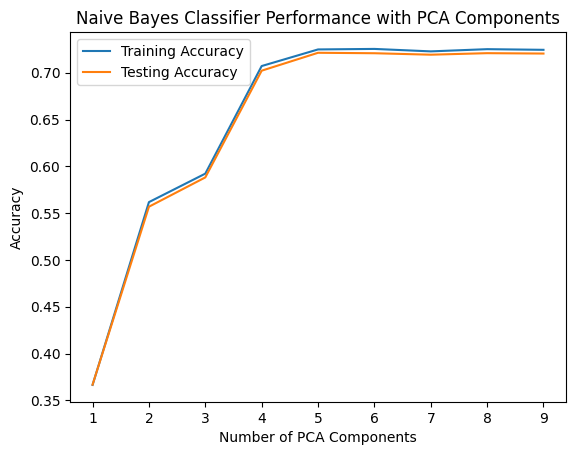

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different numbers of PCA components
for n in range(1, n_components+1):
    # Applying PCA
    pca = PCA(n_components=n)
    X_pca_nb = pca.fit_transform(X_scaled_df)

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca_nb, y_combined, test_size=0.3, random_state=42)

    # Training KNN classifier
    naive_bayes = GaussianNB()
    naive_bayes.fit(X_train, y_train)

    # Calculating training accuracy
    train_pred = naive_bayes.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)

    # Calculating testing accuracy
    test_pred = naive_bayes.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

# Plotting the training and testing accuracies
plt.plot(range(1, n_components+1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, n_components+1), test_accuracies, label='Testing Accuracy')
plt.title('Naive Bayes Classifier Performance with PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

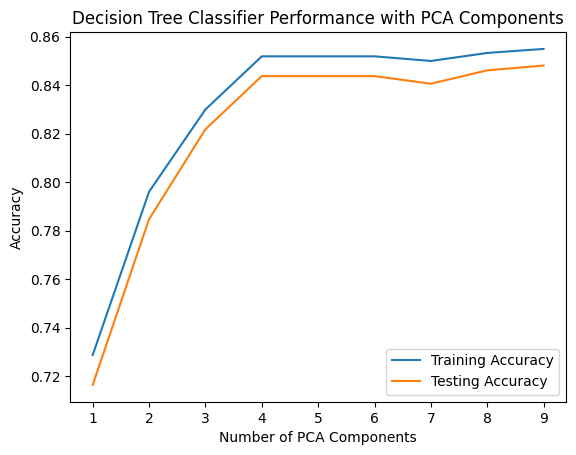

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different numbers of PCA components
for n in range(1, n_components + 1):
    # Applying PCA
    pca = PCA(n_components=n)
    X_pca_dt = pca.fit_transform(X_scaled_df)

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca_dt, y_combined, test_size=0.3, random_state=42)

    # Training Decision Tree classifier
    dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
    dt_classifier.fit(X_train, y_train)

    # Calculating training accuracy
    train_pred = dt_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)

    # Calculating testing accuracy
    test_pred = dt_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

# Plotting the training and testing accuracies
plt.plot(range(1, n_components + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, n_components + 1), test_accuracies, label='Testing Accuracy')
plt.title('Decision Tree Classifier Performance with PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **NAIVE BAYES**

In [54]:
  pca = PCA(n_components=5)
  X_pca_nb = pca.fit_transform(X_scaled_df)

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_nb, y_combined, test_size=0.3, random_state=42)

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the classifier on the training data
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [57]:
# Predict the labels for the test set
y_pred = naive_bayes.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.7213371459694989
                     precision    recall  f1-score   support

     ARP_poisioning       0.56      0.22      0.31      3952
     DDOS_Slowloris       0.65      0.81      0.72       412
       MQTT_Publish       1.00      0.99      1.00      2071
  NMAP_OS_DETECTION       1.00      0.99      0.99      1062
      NMAP_TCP_scan       1.00      1.00      1.00       482
      NMAP_UDP_SCAN       0.51      0.93      0.66      1360
NMAP_XMAS_TREE_SCAN       1.00      1.00      1.00       992
        Thing_Speak       0.65      0.84      0.73      3983
         Wipro_bulb       0.48      0.57      0.52       374

           accuracy                           0.72     14688
          macro avg       0.76      0.82      0.77     14688
       weighted avg       0.72      0.72      0.69     14688



In [58]:
y_predict = naive_bayes.predict(X_test)

In [59]:
naive_bayes.score(X_test, y_test) #testing accuracy

0.7213371459694989

In [60]:
naive_bayes.score(X_train, y_train) #training accuracy

0.7249117278006362

In [61]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report

f1_score(y_test, y_predict, average='weighted')

0.6905454154568583

In [62]:
confusion_matrix(y_test, y_predict)

array([[ 861,  162,    4,    1,    0, 1185,    0, 1677,   62],
       [   2,  333,    0,    0,    0,    0,    0,    1,   76],
       [   5,    1, 2060,    0,    0,    0,    0,    0,    5],
       [   0,    0,    0, 1050,    0,    0,    0,    0,   12],
       [   0,    1,    0,    0,  480,    0,    0,    0,    1],
       [   3,    2,    0,    0,    0, 1271,    0,   10,   74],
       [   0,    2,    0,    0,    0,    0,  988,    2,    0],
       [ 599,    6,    0,    0,    0,   40,    0, 3338,    0],
       [  77,    3,    0,    0,    0,    5,    0,   75,  214]])

In [63]:
accuracy_score(y_test, y_predict) #similar to clf.score

0.7213371459694989

In [64]:
precision_recall_fscore_support(y_test, y_predict)

(array([0.55656109, 0.65294118, 0.99806202, 0.99904853, 1.        ,
        0.50819672, 1.        , 0.65412502, 0.48198198]),
 array([0.21786437, 0.80825243, 0.99468856, 0.98870056, 0.99585062,
        0.93455882, 0.99596774, 0.83806176, 0.57219251]),
 array([0.31314785, 0.72234273, 0.99637243, 0.99384761, 0.997921  ,
        0.65837866, 0.9979798 , 0.73475677, 0.52322738]),
 array([3952,  412, 2071, 1062,  482, 1360,  992, 3983,  374]))

In [65]:
print(classification_report(y_test, y_predict))

                     precision    recall  f1-score   support

     ARP_poisioning       0.56      0.22      0.31      3952
     DDOS_Slowloris       0.65      0.81      0.72       412
       MQTT_Publish       1.00      0.99      1.00      2071
  NMAP_OS_DETECTION       1.00      0.99      0.99      1062
      NMAP_TCP_scan       1.00      1.00      1.00       482
      NMAP_UDP_SCAN       0.51      0.93      0.66      1360
NMAP_XMAS_TREE_SCAN       1.00      1.00      1.00       992
        Thing_Speak       0.65      0.84      0.73      3983
         Wipro_bulb       0.48      0.57      0.52       374

           accuracy                           0.72     14688
          macro avg       0.76      0.82      0.77     14688
       weighted avg       0.72      0.72      0.69     14688



In [66]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(naive_bayes, X_pca, y_combined, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean and standard deviation of the scores
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Cross-validation scores: [0.72120098 0.7250817  0.74486774 0.72546216 0.69645593]
Mean CV score: 0.722613700690844
Standard deviation of CV scores: 0.01546396850021609


In [68]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# Predict probabilities of the positive class for the test data
y_proba = naive_bayes.predict_proba(X_test)

# Calculate the ROC AUC score
auc_score = roc_auc_score(y_test, y_proba, multi_class='ovr')
print("ROC AUC Score for Naive Bayes:",auc_score)

ROC AUC Score for Naive Bayes: 0.9527167519688773


# **DECISON TREE**

In [69]:
  pca = PCA(n_components=9)
  X_pca_dt = pca.fit_transform(X_scaled_df)

In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_dt, y_combined, test_size=0.3, random_state=42)

In [71]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

[Text(0.5, 0.9, 'x[1] <= -0.089\ngini = 0.814\nsamples = 34269\nvalue = [9188, 954, 5066, 2384, 1024, 3093, 2472, 9207, 881]'),
 Text(0.25, 0.7, 'x[3] <= -0.051\ngini = 0.561\nsamples = 19448\nvalue = [9065, 774, 32, 0, 2, 228, 4, 9110, 233]'),
 Text(0.125, 0.5, 'x[0] <= 1.15\ngini = 0.463\nsamples = 10183\nvalue = [2179, 770, 28, 0, 2, 15, 3, 7096, 90]'),
 Text(0.0625, 0.3, 'x[2] <= -0.036\ngini = 0.332\nsamples = 8933\nvalue = [1732, 1, 0, 0, 0, 13, 3, 7094, 90]'),
 Text(0.03125, 0.1, 'gini = 0.233\nsamples = 7907\nvalue = [1061, 0, 0, 0, 0, 2, 0, 6841, 3]'),
 Text(0.09375, 0.1, 'gini = 0.504\nsamples = 1026\nvalue = [671, 1, 0, 0, 0, 11, 3, 253, 87]'),
 Text(0.1875, 0.3, 'x[0] <= 1.247\ngini = 0.493\nsamples = 1250\nvalue = [447, 769, 28, 0, 2, 2, 0, 2, 0]'),
 Text(0.15625, 0.1, 'gini = 0.346\nsamples = 967\nvalue = [174, 762, 28, 0, 0, 1, 0, 2, 0]'),
 Text(0.21875, 0.1, 'gini = 0.069\nsamples = 283\nvalue = [273, 7, 0, 0, 2, 1, 0, 0, 0]'),
 Text(0.375, 0.5, 'x[7] <= -0.181\ngini = 

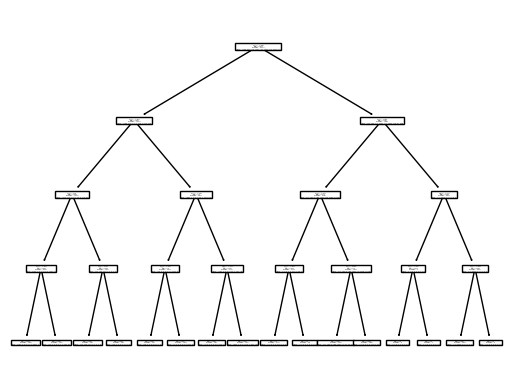

In [72]:
from sklearn import tree

tree.plot_tree(dt)

In [73]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the labels for the test set
y_pred = dt.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8481072984749455


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

     ARP_poisioning       0.86      0.83      0.84      3952
     DDOS_Slowloris       0.77      0.80      0.78       412
       MQTT_Publish       1.00      0.99      1.00      2071
  NMAP_OS_DETECTION       0.52      1.00      0.68      1062
      NMAP_TCP_scan       0.00      0.00      0.00       482
      NMAP_UDP_SCAN       1.00      0.86      0.93      1360
NMAP_XMAS_TREE_SCAN       0.99      0.99      0.99       992
        Thing_Speak       0.86      0.90      0.88      3983
         Wipro_bulb       0.00      0.00      0.00       374

           accuracy                           0.85     14688
          macro avg       0.67      0.71      0.68     14688
       weighted avg       0.82      0.85      0.83     14688



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report

f1_score(y_test, y_predict, average='weighted')

0.6905454154568583

In [75]:
dt.score(X_train, y_train) #training accuracy

0.8549709650121101

In [76]:
dt.score(X_test, y_test) #testing accuracy

0.8481072984749455

In [77]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dt, X_pca, y_combined, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean and standard deviation of the scores
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Cross-validation scores: [0.85232843 0.85334967 0.79675212 0.86089266 0.89286079]
Mean CV score: 0.8512367341823189
Standard deviation of CV scores: 0.030983958675575216


In [80]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# Predict probabilities of the positive class for the test data
y_proba = dt.predict_proba(X_test)

# Calculate the ROC AUC score
auc_score = roc_auc_score(y_test, y_proba, multi_class='ovr')
print("ROC AUC Score for Decision Tree:",auc_score)

ROC AUC Score for Decision Tree: 0.961296740902465


# **correct loop---------------------------------------------------------**

Optimal Parameter Value: 37


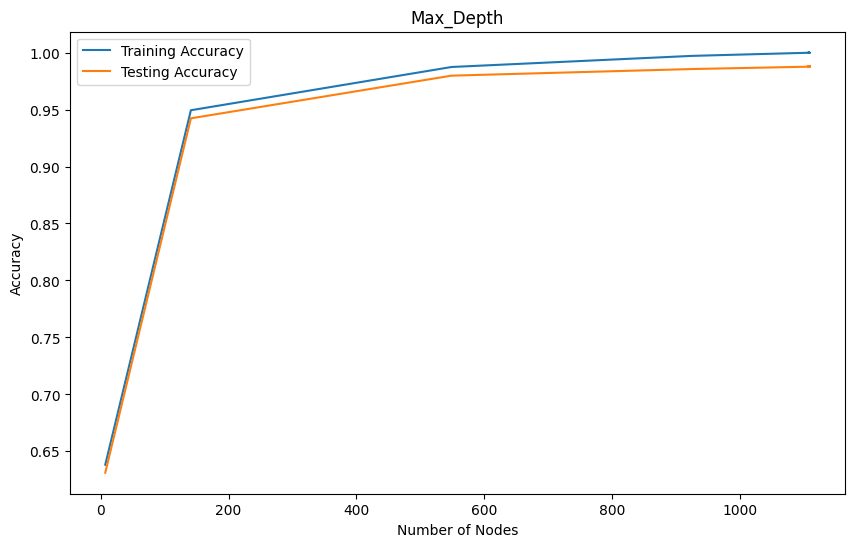

In [103]:
Train_acc = []
Test_acc = []
Node_count = []
parameter_value = []

max_depth_range = np.arange(2, 1001, 5)

for i in max_depth_range:
    temp_train_acc = []
    temp_test_acc = []
    temp_node_count = []

    for _ in range(10):

        dt = DecisionTreeClassifier(max_depth=i)
        dt.fit(X_train, y_train)


        temp_train_acc.append(dt.score(X_train, y_train))
        temp_test_acc.append(dt.score(X_test, y_test))
        temp_node_count.append(dt.tree_.node_count)


    Train_acc.append(np.mean(temp_train_acc))
    Test_acc.append(np.mean(temp_test_acc))
    Node_count.append(np.mean(temp_node_count))
    parameter_value.append(i)

optimal_index = None
for i in range(1, len(Node_count)):
    if Test_acc[i] < Test_acc[i-1]:
        optimal_index = i-1
        break

# Getting the parameter value at the found index
optimal_parameter_value = parameter_value[optimal_index]

print("Optimal Parameter Value:", optimal_parameter_value)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Node_count, Train_acc, label='Training Accuracy')
plt.plot(Node_count, Test_acc, label='Testing Accuracy')
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Max_Depth')
plt.legend()
plt.show()

Optimal Parameter Value: 2


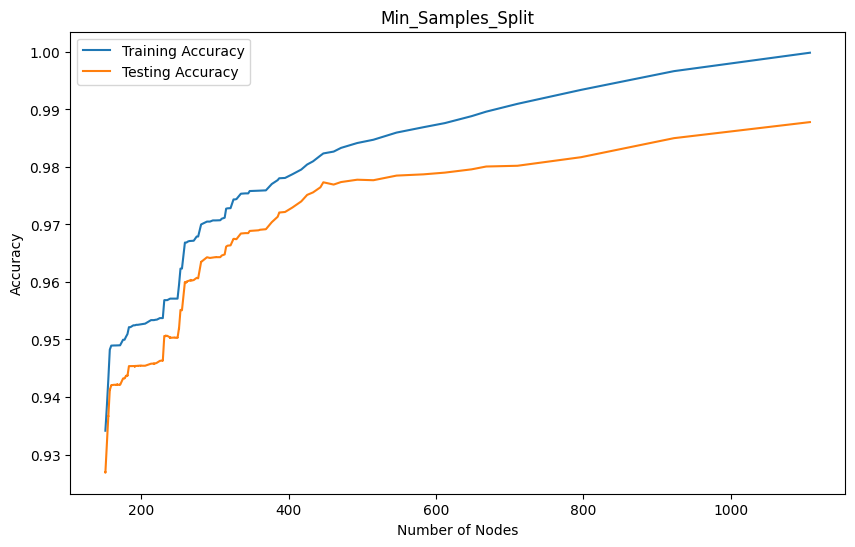

In [104]:
Train_acc = []
Test_acc = []
Node_count = []
parameter_value = []

min_samples_split_range = np.arange(2, 1001, 5)

for i in min_samples_split_range:
    temp_train_acc = []
    temp_test_acc = []
    temp_node_count = []


    for _ in range(10):

        clf = DecisionTreeClassifier(min_samples_split=i)
        clf.fit(X_train, y_train)


        temp_train_acc.append(clf.score(X_train, y_train))
        temp_test_acc.append(clf.score(X_test, y_test))
        temp_node_count.append(clf.tree_.node_count)


    Train_acc.append(np.mean(temp_train_acc))
    Test_acc.append(np.mean(temp_test_acc))
    Node_count.append(np.mean(temp_node_count))
    parameter_value.append(i)

optimal_index = None
for i in range(1, len(Node_count)):
    if Test_acc[i] < Test_acc[i-1]:
        optimal_index = i-1
        break

# Getting the parameter value at the found index
optimal_parameter_value = parameter_value[optimal_index]

print("Optimal Parameter Value:", optimal_parameter_value)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Node_count, Train_acc, label='Training Accuracy')
plt.plot(Node_count, Test_acc, label='Testing Accuracy')
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Min_Samples_Split')
plt.legend()
plt.show()


Optimal Parameter Value: 2


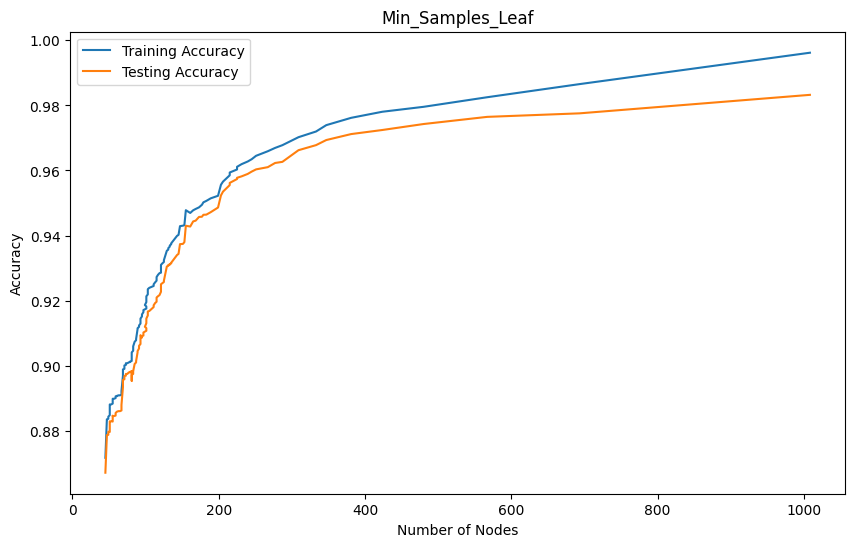

In [105]:
Train_acc = []
Test_acc = []
Node_count = []
parameter_value = []

min_samples_leaf_range = np.arange(2, 1001, 5)

for i in min_samples_leaf_range:
    temp_train_acc = []
    temp_test_acc = []
    temp_node_count = []

    for _ in range(10):

        clf = DecisionTreeClassifier(min_samples_leaf=i)
        clf.fit(X_train, y_train)

        temp_train_acc.append(clf.score(X_train, y_train))
        temp_test_acc.append(clf.score(X_test, y_test))
        temp_node_count.append(clf.tree_.node_count)


    Train_acc.append(np.mean(temp_train_acc))
    Test_acc.append(np.mean(temp_test_acc))
    Node_count.append(np.mean(temp_node_count))
    parameter_value.append(i)

optimal_index = None
for i in range(1, len(Node_count)):
    if Test_acc[i] < Test_acc[i-1]:
        optimal_index = i-1
        break

# Getting the parameter value at the found index
optimal_parameter_value = parameter_value[optimal_index]

print("Optimal Parameter Value:", optimal_parameter_value)


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Node_count, Train_acc, label='Training Accuracy')
plt.plot(Node_count, Test_acc, label='Testing Accuracy')
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Min_Samples_Leaf')
plt.legend()
plt.show()



Optimal Parameter Value: 0.001


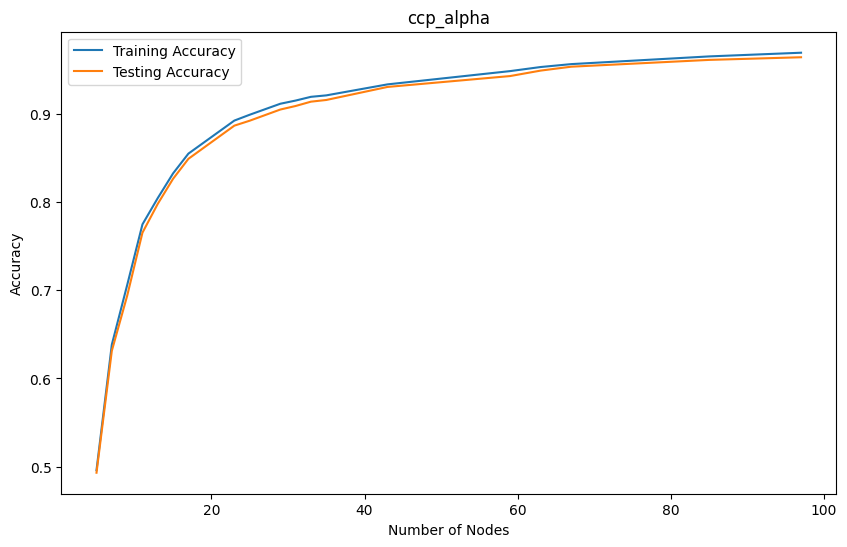

In [106]:
Train_acc = []
Test_acc = []
Node_count = []
parameter_value = []

ccp_alpha_range = [0.001 + i * 0.0005 for i in range(int((0.1 - 0.001)/0.0005)+1)]

for i in ccp_alpha_range:
    temp_train_acc = []
    temp_test_acc = []
    temp_node_count = []


    for _ in range(10):

        clf = DecisionTreeClassifier(ccp_alpha=i)
        clf.fit(X_train, y_train)


        temp_train_acc.append(clf.score(X_train, y_train))
        temp_test_acc.append(clf.score(X_test, y_test))
        temp_node_count.append(clf.tree_.node_count)


    Train_acc.append(np.mean(temp_train_acc))
    Test_acc.append(np.mean(temp_test_acc))
    Node_count.append(np.mean(temp_node_count))
    parameter_value.append(i)

optimal_index = None
for i in range(1, len(Node_count)):
    if Test_acc[i] < Test_acc[i-1]:
        optimal_index = i-1
        break

# Getting the parameter value at the found index
optimal_parameter_value = parameter_value[optimal_index]

print("Optimal Parameter Value:", optimal_parameter_value)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Node_count, Train_acc, label='Training Accuracy')
plt.plot(Node_count, Test_acc, label='Testing Accuracy')
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('ccp_alpha')
plt.legend()
plt.show()
